In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from utils import *

# Class contributions

## KiDS x SDSS

In [3]:
kids = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.merged.cols.500k.csv')

Data shape: (502439, 37)
Droping NANs: 502439 left
Removing flags: 210401 left
Removing errors bigger than 1: 135040 left
Removing limiting magnitudes: 50084 left


In [7]:
kids_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True)

Data shape: (91317, 44)
Droping NANs: 91317 left
Removing flags: 31908 left
Removing errors bigger than 1: 30018 left
Removing limiting magnitudes: 26237 left
Cleaning SDSS: 24021 left


In [19]:
print(describe_column(kids_x_sdss['CLASS']))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([12113,  4552,  7356]), array([50.42670996, 18.95008534, 30.6232047 ]))


In [ ]:
## KiDS x GAIA

In [9]:
kids_x_gaia = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.GAIA.cols.csv')

Data shape: (1525462, 37)
Droping NANs: 1525462 left
Removing flags: 599223 left
Removing errors bigger than 1: 580040 left
Removing limiting magnitudes: 513104 left


In [11]:
kids_x_gaia_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.GAIA.x.SDSS.DR14.cols.csv', sdss_cleaning=True)

Data shape: (29297, 42)
Droping NANs: 29297 left
Removing flags: 10645 left
Removing errors bigger than 1: 10567 left
Removing limiting magnitudes: 10445 left
Cleaning SDSS: 10061 left


In [12]:
print(describe_column(kids_x_gaia_sdss['CLASS']))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([2098, 2522, 5441]), array([20.85279793, 25.06709075, 54.08011132]))


## KiDS CLASS_STAR

In [16]:
kids_star = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.STAR.cols.csv')

Data shape: (4514831, 37)
Droping NANs: 4514831 left
Removing flags: 1976131 left
Removing errors bigger than 1: 1553465 left
Removing limiting magnitudes: 983000 left


In [17]:
kids_star_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.STAR.x.SDSS.DR14.cols.csv', sdss_cleaning=True)

Data shape: (30940, 42)
Droping NANs: 30940 left
Removing flags: 13861 left
Removing errors bigger than 1: 13646 left
Removing limiting magnitudes: 13313 left
Cleaning SDSS: 11413 left


In [18]:
print(describe_column(kids_star_x_sdss['CLASS']))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  62, 4105, 7246]), array([ 0.54324016, 35.96775607, 63.48900377]))


### Sum up

KiDS 50M -> clean 5M (estimated ~10%)-> x SDSS 24k

KiDS x GAIA 1525462 -> clean 513104 -> x SDSS 10k

KiDS CLASS_STAR 4514832 -> clean 983000 -> x SDSS 11413

# Magnitudes changes when crossing with SDSS

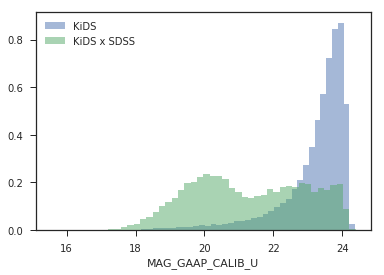

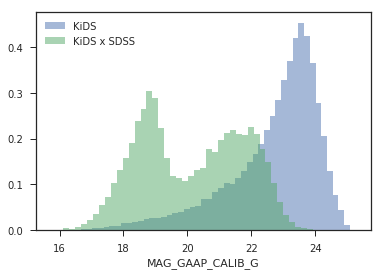

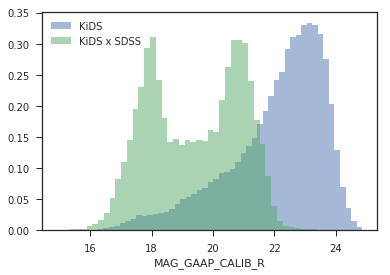

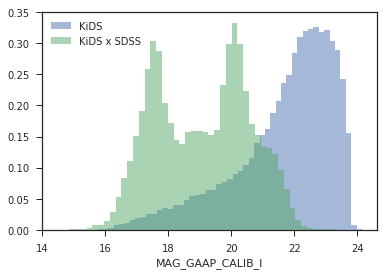

In [16]:
sns.set(style='ticks')
for b in BAND_COLUMNS:
    plt.figure()
    sns.distplot(kids[b], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_x_sdss[b], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.legend()

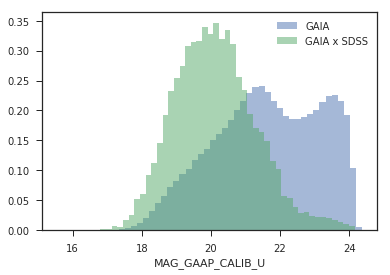

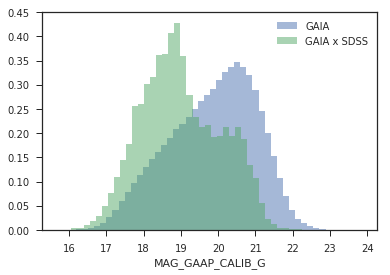

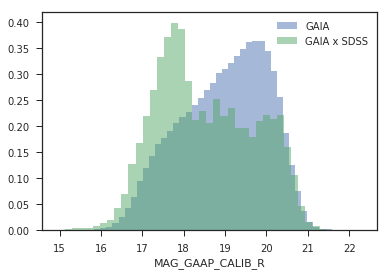

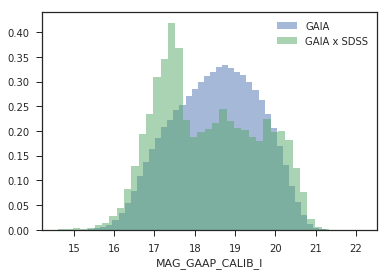

In [17]:
sns.set(style='ticks')
for b in BAND_COLUMNS:
    plt.figure()
    sns.distplot(kids_x_gaia[b], label='GAIA', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_x_gaia_sdss[b], label='GAIA x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.legend()

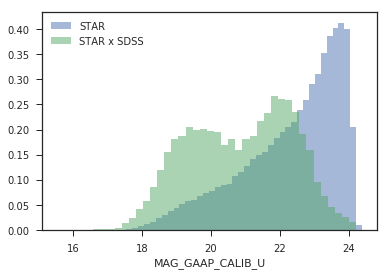

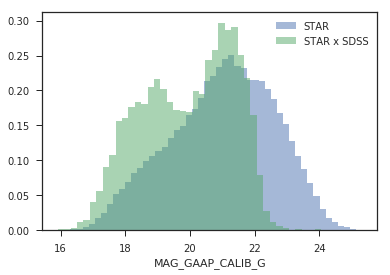

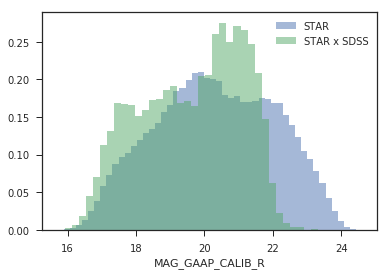

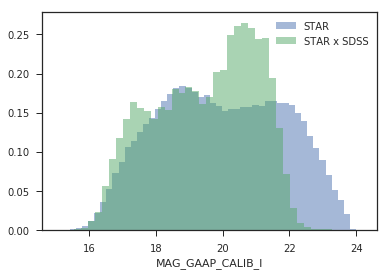

In [18]:
sns.set(style='ticks')
for b in BAND_COLUMNS:
    plt.figure()
    sns.distplot(kids_star[b], label='STAR', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_x_sdss_star[b], label='STAR x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.legend()

# Redshift

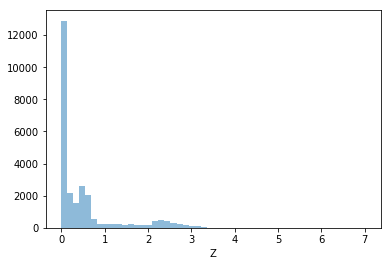

In [7]:
sns.distplot(kids_x_sdss['Z'], kde=False, rug=False, hist_kws={'alpha': 0.5})

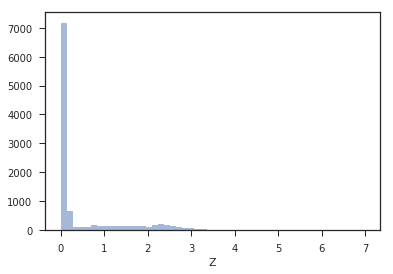

In [22]:
sns.distplot(kids_x_gaia_sdss['Z'], kde=False, rug=False, hist_kws={'alpha': 0.5})

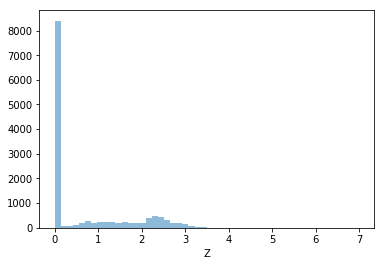

In [9]:
sns.distplot(kids_x_sdss_star['Z'], kde=False, rug=False, hist_kws={'alpha': 0.5})

## Redshift per class

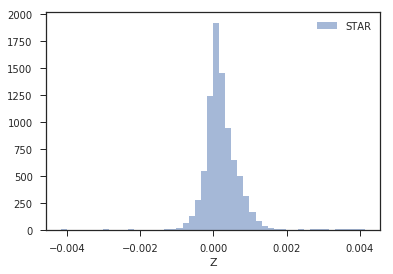

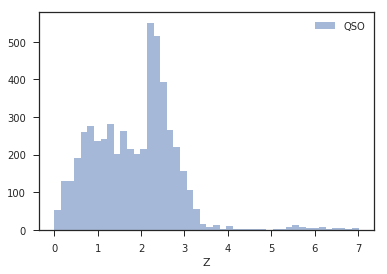

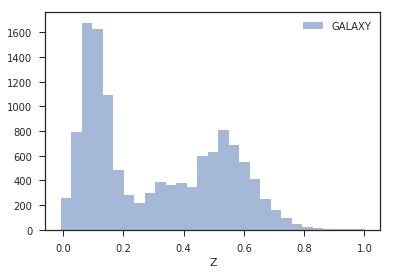

In [9]:
sns.set(style='ticks')
for c in ['STAR', 'QSO', 'GALAXY']:
    plt.figure()
    sns.distplot(kids_x_sdss.loc[kids_x_sdss['CLASS'] == c]['Z'], label=c, kde=False, rug=False, hist_kws={'alpha': 0.5})
    plt.legend()

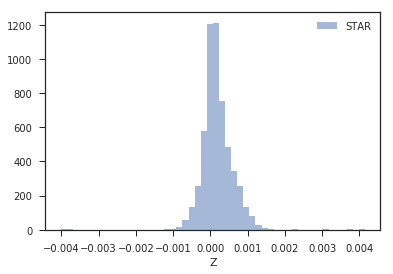

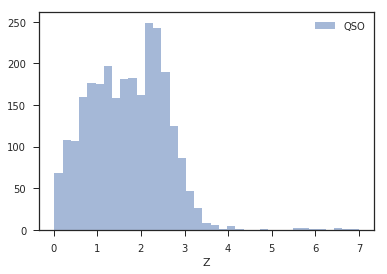

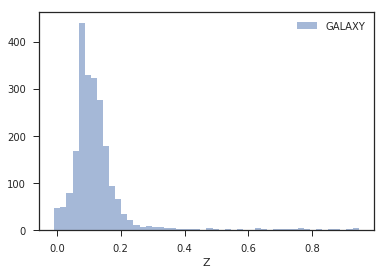

In [20]:
sns.set(style='ticks')
for c in ['STAR', 'QSO', 'GALAXY']:
    plt.figure()
    sns.distplot(kids_x_gaia_sdss.loc[kids_x_gaia_sdss['CLASS'] == c]['Z'], label=c, kde=False, rug=False,
                 hist_kws={'alpha': 0.5})
    plt.legend()

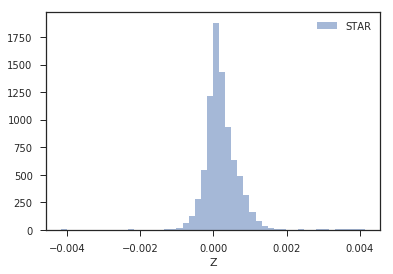

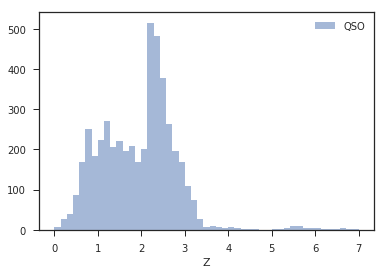

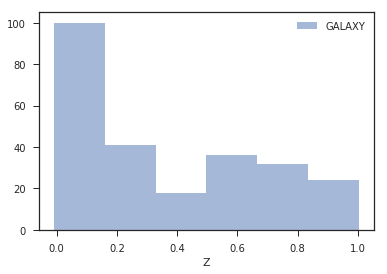

In [10]:
sns.set(style='ticks')
for c in ['STAR', 'QSO', 'GALAXY']:
    plt.figure()
    sns.distplot(kids_x_sdss_star.loc[kids_x_sdss_star['CLASS'] == c]['Z'], label=c, kde=False, rug=False,
                 hist_kws={'alpha': 0.5})
    plt.legend()

# "PhotoZ" vs "SpectroZ"

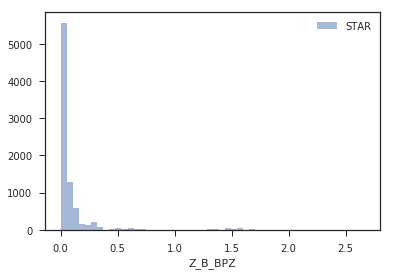

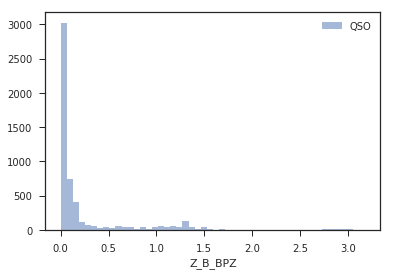

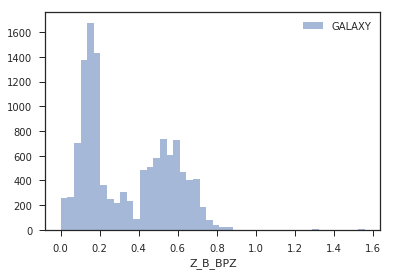

In [6]:
sns.set(style='ticks')
for c in ['STAR', 'QSO', 'GALAXY']:
    plt.figure()
    sns.distplot(kids_x_sdss.loc[kids_x_sdss['CLASS'] == c]['Z_B_BPZ'], label=c, kde=False, rug=False,
                 hist_kws={'alpha': 0.5})
    plt.legend()

In [7]:
kids_star = pd.read_csv('/home/snakoneczny/data/KiDS/KiDS.DR3.stars.cols.csv', usecols=['Z_B_BPZ'])

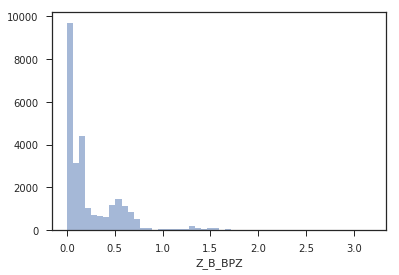

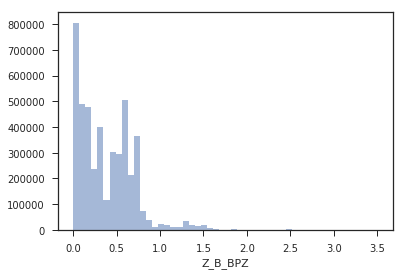

In [10]:
sns.set(style='ticks')

plt.figure()
sns.distplot(kids_x_sdss['Z_B_BPZ'], kde=False, rug=False, hist_kws={'alpha': 0.5})

plt.figure()
sns.distplot(kids_star['Z_B_BPZ'], kde=False, rug=False, hist_kws={'alpha': 0.5})

# Sublacsses

In [9]:
qso_kids_sdss = kids_x_sdss.loc[kids_x_sdss['CLASS'] == 'QSO']

In [10]:
describe_column(qso_kids_sdss['SUBCLASS'].dropna())

(array(['AGN', 'AGN BROADLINE', 'BROADLINE', 'STARBURST',
        'STARBURST BROADLINE', 'STARFORMING', 'STARFORMING BROADLINE'],
       dtype=object),
 array([  14,   36, 3675,    2,   96,    2,    6]),
 array([3.65439833e-01, 9.39702428e-01, 9.59279561e+01, 5.22056904e-02,
        2.50587314e+00, 5.22056904e-02, 1.56617071e-01]))

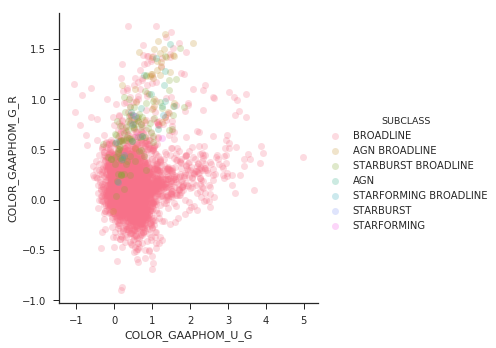

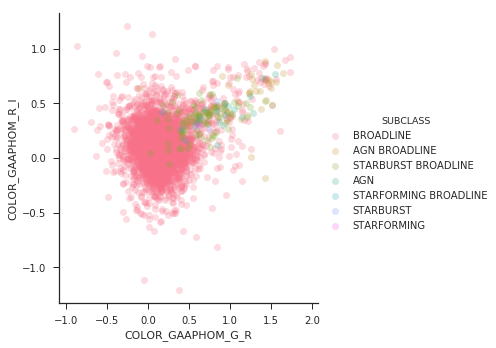

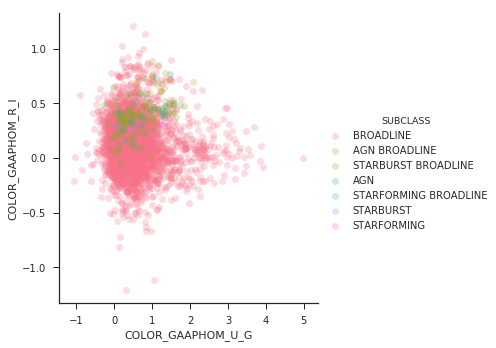

In [11]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='SUBCLASS', data=qso_kids_sdss, fit_reg=False, scatter_kws={'alpha': 0.25})

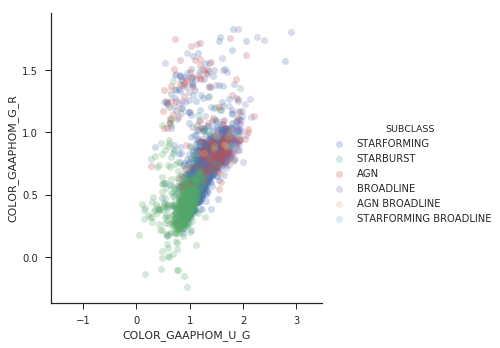

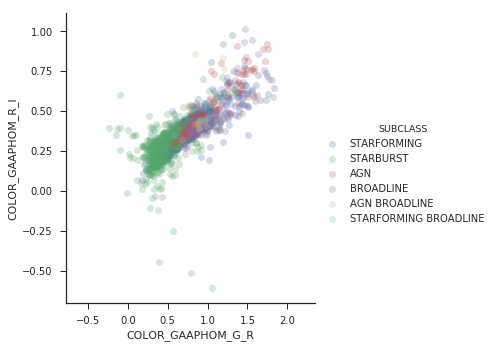

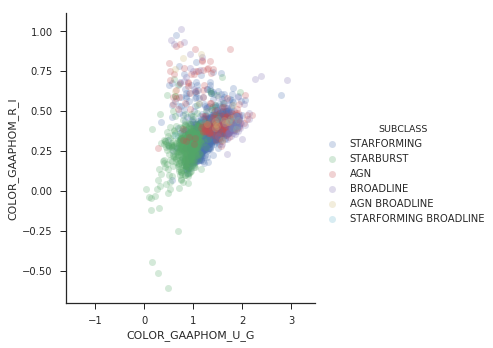

In [12]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='SUBCLASS', data=kids_x_sdss.loc[kids_x_sdss['CLASS'] == 'GALAXY'], fit_reg=False, scatter_kws={'alpha': 0.25})

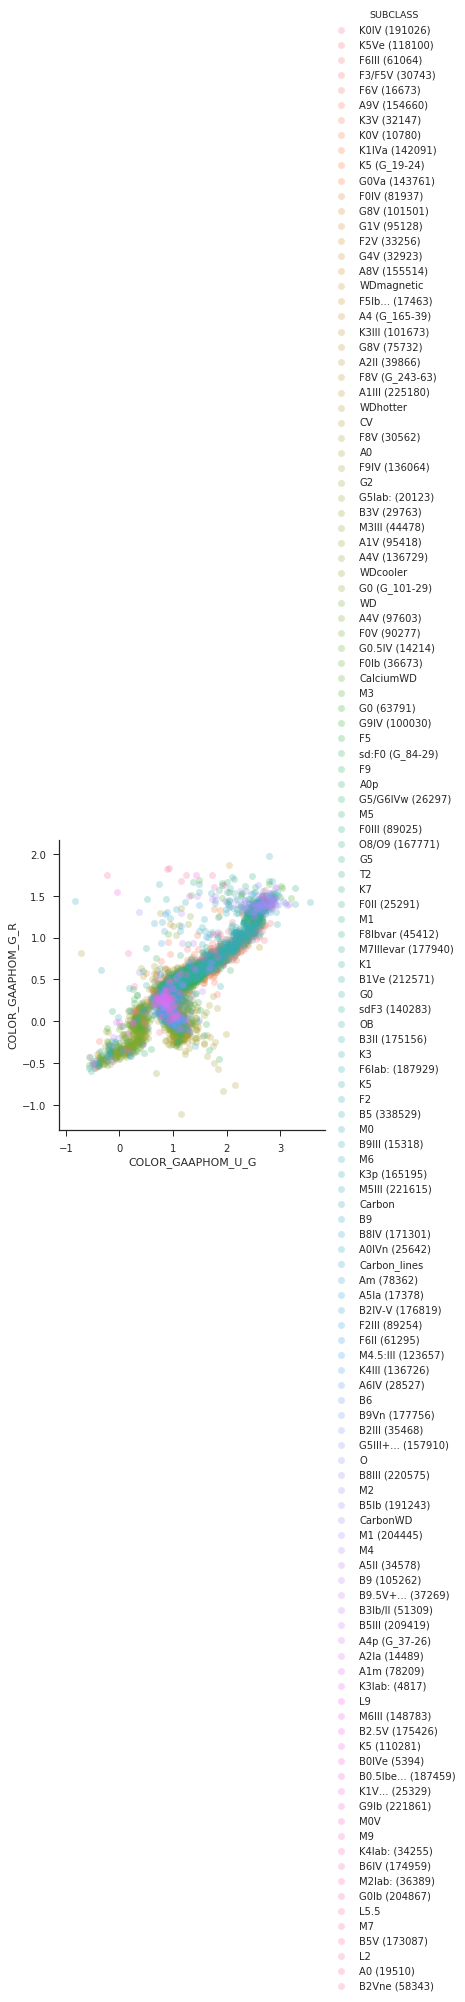

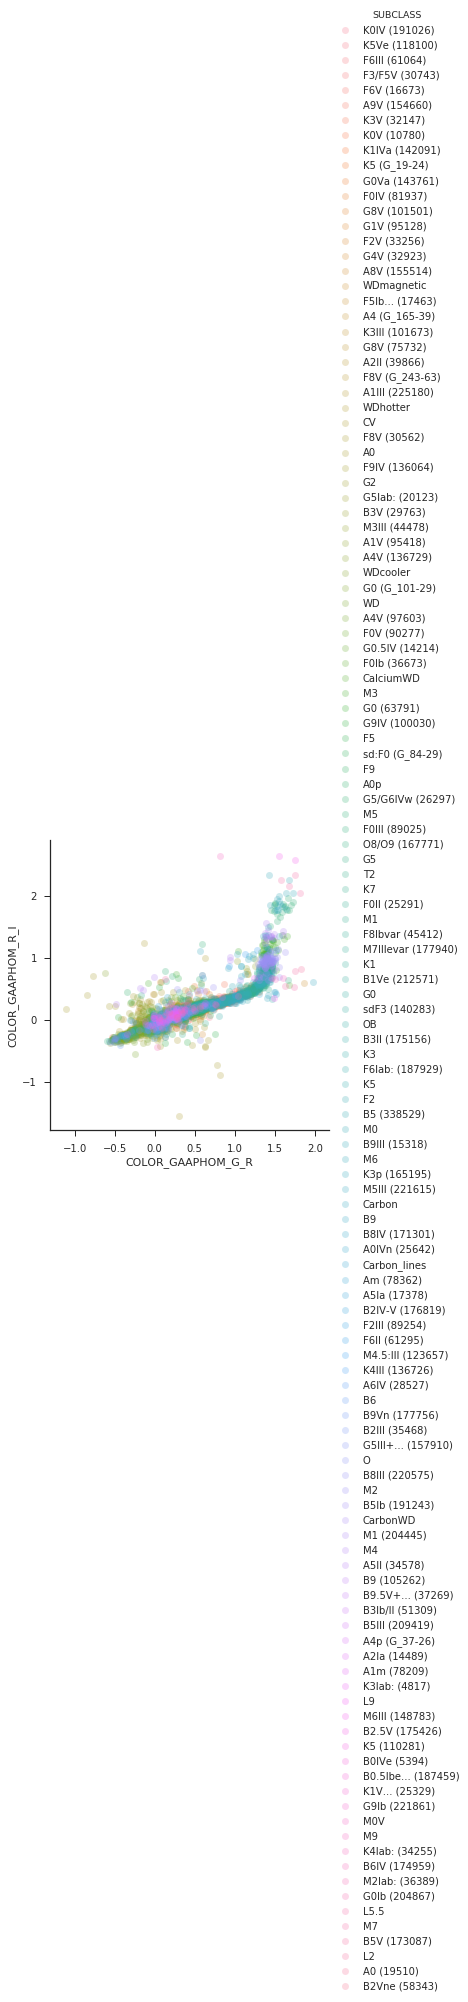

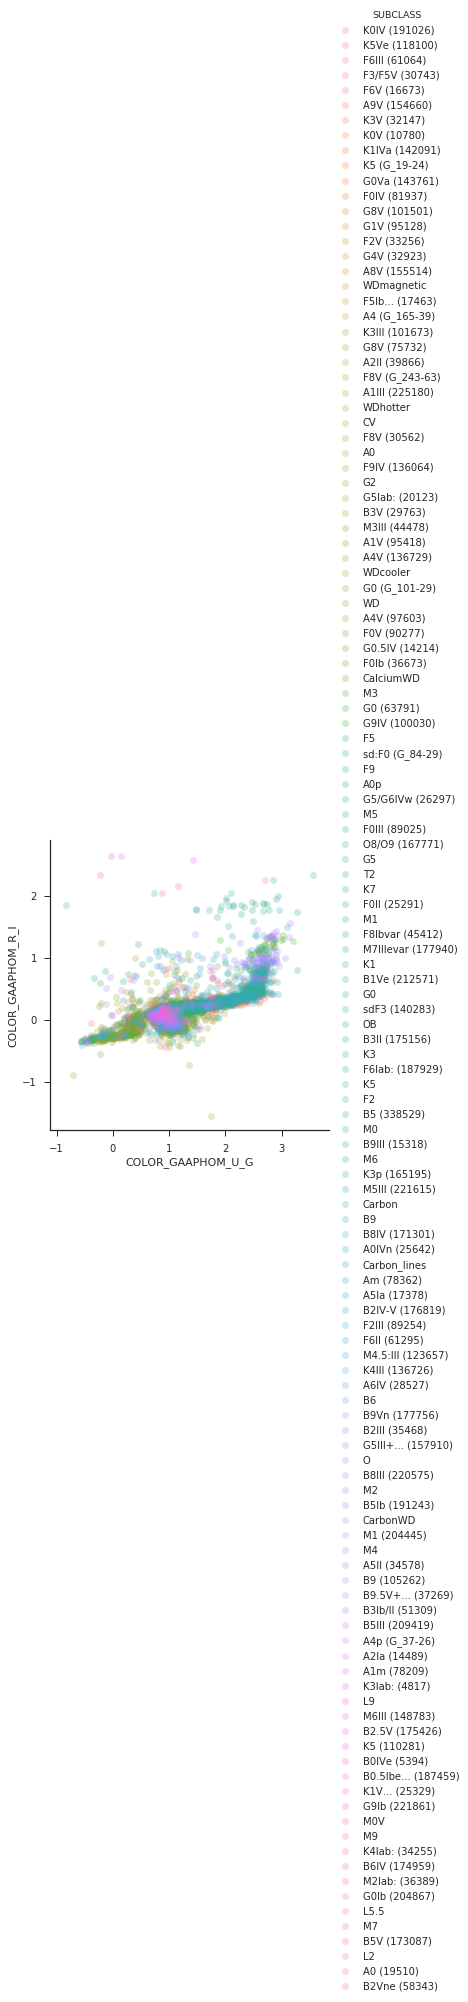

In [13]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='SUBCLASS', data=kids_x_sdss.loc[kids_x_sdss['CLASS'] == 'STAR'], fit_reg=False, scatter_kws={'alpha': 0.25})